# Stable Diffusion Implemented in Tensorflow / Keras
https://github.com/divamgupta/stable-diffusion-tensorflow

In [2]:
! pip install --upgrade git+https://github.com/divamgupta/stable-diffusion-tensorflow
! pip install tensorflow_addons
! pip install ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/divamgupta/stable-diffusion-tensorflow to /tmp/pip-req-build-wgad1zj5
  Running command git clone -q https://github.com/divamgupta/stable-diffusion-tensorflow /tmp/pip-req-build-wgad1zj5
  Created wheel for stable-diffusion-tf: filename=stable_diffusion_tf-0.1-py3-none-any.whl size=16124 sha256=a5b944834387bbc9d517d2bb8a026021319207d13fa0ff317c3d1d57d2f6503c
  Stored in directory: /tmp/pip-ephem-wheel-cache-hs03bhki/wheels/83/77/d2/8a0a1433ec2e598f908dbf726108785e86c1c1421c8f896f87
Successfully built stable-diffusion-tf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.1 MB/s 
     |████████████████████████████

In [3]:
from stable_diffusion_tf.stable_diffusion import get_model, text2image
text_encoder, diffusion_model, decoder = get_model(512, 512, download_weights=True)


3440328704/3440313488 [==============================] - 16s 0us/step


In [5]:
import numpy as np
import gradio as gr

def generate_image(prompt_input, img_height, img_width , n_steps):
    img_height = int(img_height)
    img_width = int(img_width)
    n_steps = int(n_steps)
    prompt_input = str(prompt_input)

    return text2image(prompt_input , 
      img_height=img_height, 
      img_width=img_width,  
      text_encoder=text_encoder, 
      diffusion_model=diffusion_model, 
      decoder=decoder,
      batch_size=1,
      n_steps=n_steps
    )[0]

running for [1, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 721, 761, 801, 841, 881, 921, 961] timesteps


  0   1: 100%|██████████| 25/25 [00:39<00:00,  1.57s/it]


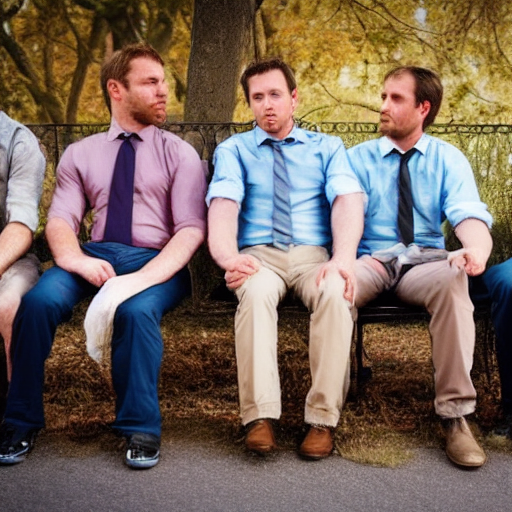

In [11]:
text="Men sitting hopeless"
img = text2image(text, 
	img_height=512, 
	img_width=512,  
	text_encoder=text_encoder, 
	diffusion_model=diffusion_model, 
	decoder=decoder,
  batch_size=1
)

from PIL import Image
Image.fromarray(img[0])